# 신용카드 고객 Segmentation 
- Machine Learning을 이용한 신용카드 고객 clustering   


- Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata  


- CUSTID: 신용카드 소지자 ID  
- BALANCE: 구매를 위해 고객 계정에 남아 있는 잔액  
- BALANCE_FREQUENCY: 잔액이 업데이트되는 빈도, 0에서 1 사이의 점수(1 = 자주 업데이트, 0 = 자주 업데이트되지 않음)  
- PURCHASES: 계정에서 구매한 금액  
- ONEOFFPURCHASES: 한 번에 완료되는 최대 구매 금액  
- INSTALLMENTS_PURCHASES: 할부 금액  
- CASH_ADVANCE: 현금서비스  
- PURCHASES_FREQUENCY: 구매 빈도, 0에서 1 사이의 점수(1 = 자주 구매, 0 = 자주 구매하지 않음)  
- ONEOFF_PURCHASES_FREQUENCY:한 번에 구매하는 빈도(1 = 자주 구매, 0 = 자주 구매하지 않음)  
- PURCHASES_INSTALLMENTS_FREQUENCY: 설치 시 구매가 수행되는 빈도(1 = 자주 수행, 0 = 자주 수행하지 않음)  
- CASH_ADVANCE_FREQUENCY: 현금 선지급 빈도  
- CASH_ADVANCE_TRX: "선불" 거래 건수  
- PURCHASES_TRX: 구매한 거래 수  
- CREDIT_LIMIT: 사용자 신용카드 한도  
- PAYMENTS: 사용자가 지불한 금액  
- MINIMUM_PAYMENTS: 사용자가 지불하는 최소 금액  
- PRC_FULL_PAYMENT: 사용자가 지불한 전체 결제 비율  
- TENURE: 이용자의 신용카드 서비스 이용기간

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import korean

In [2]:
df = pd.read_csv('data/Marketing_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

기술 통계 파악

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- ONEOFF_PURCHASES 최대 구매 (40761.25)를 한 고객

In [5]:
df[df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


missing value check

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- `MINIMUM_PAYMENT`의 평균으로 missing value를 보충합니다.

In [7]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

- 누락된 요소를 `CREDIT_LIMIT`의 평균으로 보충합니다.

In [8]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

In [9]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

- 데이터에 중복된 항목이 있는지 봅니다.

In [10]:
df.duplicated().sum()

0

- Customer ID는여기서 의미가 없으므로 drop 시킵니다.

In [11]:
cust_id = df.pop("CUST_ID")
cust_id

0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C19186
8946    C19187
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8950, dtype: object

In [12]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## K-MEANS clustering model 작성

### ELBOW 방법을 사용하여 최적의 클러스터 수 찾기

- 엘보우 방법은 데이터 세트에서 적절한 클러스터 수를 찾는 데 도움이 되도록 설계된 휴리스틱 방법입니다.  
- 꺾은선형 차트가 팔처럼 보이면 팔의 "elbow"에 해당하는 k 값이 가장 좋습니다.  
- inertia_ 속성 : 가장 가까운 클러스터 중심까지의 샘플 거리의 제곱 합계,

- data scaling

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [15]:
df_scaled.shape

(8950, 17)

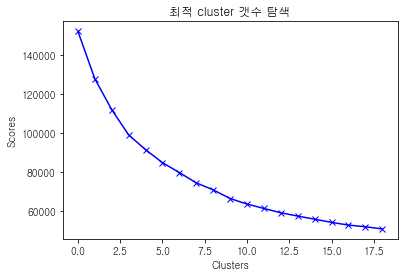

In [16]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_) 

plt.figure(figsize=(6, 4))
plt.plot(scores_1, 'bx-')
plt.title('최적 cluster 갯수 탐색')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

### K-MEANS METHOD 적용

- cluster 갯수를 8로 결정

In [17]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_
labels

array([2, 5, 0, ..., 6, 6, 6])

In [18]:
kmeans.cluster_centers_.shape

(8, 17)

각 cluster 의 center value를 이용하여 DataFrame 작성

In [19]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, 
                               columns = [df.columns])
cluster_centers           

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.132853,0.400709,0.542958,0.671904,0.049228,-0.332273,0.981009,1.905000,0.174809,-0.414225,-0.332535,0.621234,0.434750,0.145399,-0.158420,0.443535,0.268855
1,-0.360545,0.332623,-0.034027,-0.242232,0.364373,-0.363036,0.995120,-0.383199,1.207462,-0.472935,-0.360062,0.193094,-0.258968,-0.214669,-0.029820,0.314283,0.256155
2,0.011455,0.403945,-0.356775,-0.241734,-0.399373,-0.095349,-0.851271,-0.394440,-0.752905,0.101809,-0.029388,-0.481163,-0.304080,-0.250439,-0.012130,-0.455437,0.273614
3,-0.701258,-2.140285,-0.310336,-0.234722,-0.302444,-0.322272,-0.554827,-0.441460,-0.440553,-0.521236,-0.376356,-0.419376,-0.176011,-0.202115,-0.256800,0.283165,0.198977
4,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
5,1.682840,0.393015,-0.217102,-0.154800,-0.229008,2.005241,-0.471172,-0.207020,-0.412366,1.909599,1.918187,-0.264710,1.025389,0.819603,0.551258,-0.390565,0.071507
6,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809
7,1.044069,0.464401,2.531970,1.837424,2.611177,-0.141149,1.163601,1.571795,1.270158,-0.280397,-0.142502,3.142724,1.310056,1.477173,0.564717,0.264636,0.337262


- 각 value 는 scaling이 되어 있는 상태이므로 inverse transform을 통해 원래의 값으로 복원하면 각 cluster 의 의미 파악에 도움이 된다.

In [20]:
inverse_cluster_centers = scaler.inverse_transform(cluster_centers)
pd.DataFrame(data = inverse_cluster_centers, columns = [df.columns])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1287.951965,0.972195,2163.243215,1707.659742,455.583473,282.079382,0.884077,0.770756,0.433911,0.052254,0.979519,30.151380,6076.248685,2154.058840,495.015214,0.283441,11.877115
1,814.031420,0.956066,930.504921,190.382525,740.565491,217.568139,0.889740,0.088142,0.844314,0.040505,0.791667,19.509425,3552.217362,1111.697670,794.712944,0.245637,11.860119
2,1588.317455,0.972962,240.948951,191.208755,49.919826,778.919345,0.148694,0.084788,0.065214,0.155517,3.048276,2.749909,3388.082275,1008.147733,835.937768,0.020507,11.883485
3,104.865352,0.370257,340.166450,202.846306,137.571031,303.051343,0.267672,0.070762,0.189350,0.030840,0.680473,4.285714,3854.048558,1148.040394,265.744196,0.236535,11.783601
4,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
5,5067.164268,0.970372,539.362922,335.500696,203.978288,5183.955454,0.301246,0.140700,0.200553,0.517274,16.339041,8.130137,8225.233499,4105.814568,2148.888897,0.039481,11.613014
6,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140
7,3737.616647,0.987283,6412.797493,3642.184387,2772.322507,682.876054,0.957360,0.671355,0.869231,0.079034,2.276353,92.826211,9260.968661,6009.414573,2180.256092,0.231116,11.968661


- 각 datapoint가 어떤 cluster에 속하는지 label 부여

In [21]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([1, 0, 6, ..., 5, 5, 5])

클러스터 레이블을 원래 데이터 프레임에 연결

In [22]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': y_kmeans, 
                            'cust_id': cust_id})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,cust_id
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,C10001
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,C10002
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6,C10003
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1,C10004
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,C10005


- 각 column을 cluster별로 histogram으로 시각화

## Clustering한 결과를 2차원으로 시각화 하기 위해 PCA 방법 적용

In [24]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222044, -1.07645087],
       [-1.13829667,  2.50647183],
       [ 0.96968511, -0.38352535],
       ...,
       [-0.9262032 , -1.81078281],
       [-2.33655134, -0.65796131],
       [-0.55642171, -0.40046645]])

In [25]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138297,2.506472
2,0.969685,-0.383525
3,-0.873628,0.043163
4,-1.599434,-0.688580


- 클러스터 레이블을 데이터 프레임에 연결

In [26]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,2
1,-1.138297,2.506472,5
2,0.969685,-0.383525,0
3,-0.873628,0.043163,2
4,-1.599434,-0.688580,2


- 시각화

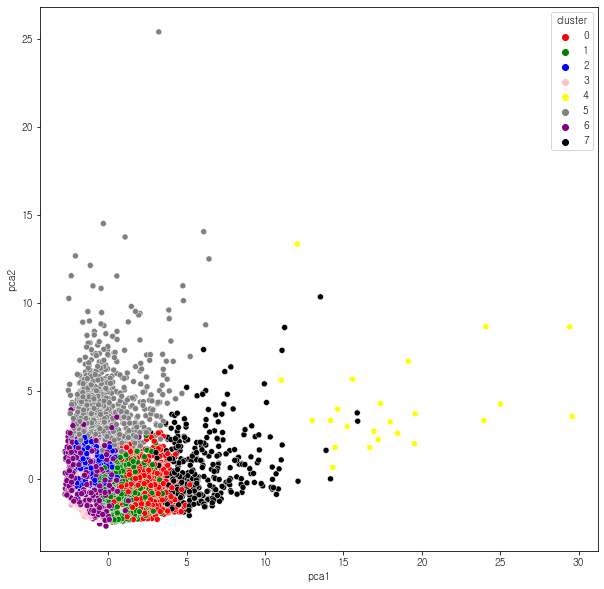

In [27]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="pca1", y="pca2", 
                hue = "cluster", data = pca_df, 
  palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

In [28]:
df_cluster = df_cluster[df_cluster['cluster'] == 4]
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,cust_id
9,152.225975,0.545455,1281.60,1281.6,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,4,C10010
17,41.089489,0.454545,519.00,0.0,519.00,0.000000,0.416667,0.000000,0.333333,0.000000,0,8,2500.0,254.590662,73.203221,0.250000,12,4,C10018
63,7.152356,0.090909,840.00,840.0,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,864.206542,0.000000,12,4,C10065
81,81.584711,0.272727,0.00,0.0,0.00,2985.300006,0.000000,0.000000,0.000000,0.166667,5,0,9500.0,116.569033,164.692136,0.000000,12,4,C10085
82,3.786310,0.636364,133.05,28.2,104.85,0.000000,0.416667,0.166667,0.250000,0.000000,0,5,12000.0,210.053432,99.533735,0.444444,12,4,C10086


### 각 column의 분포를 시각화

In [29]:
df_cluster.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster', 'cust_id'],
      dtype='object')

In [30]:
columns = df_cluster.columns[:-2]

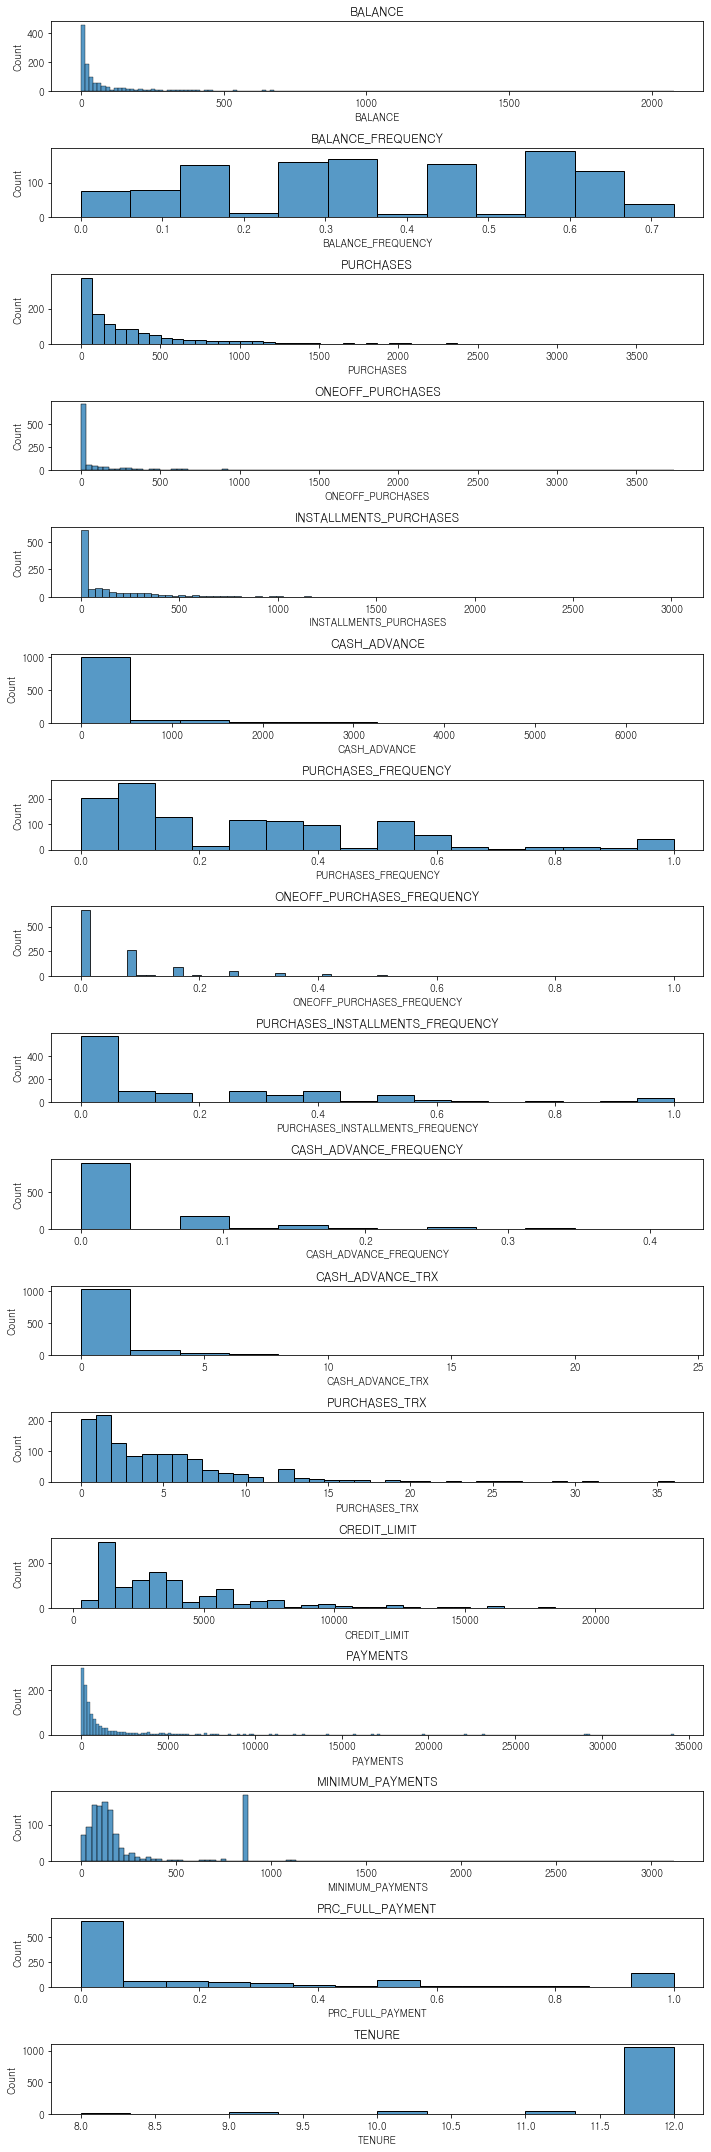

In [31]:
plt.figure(figsize=(10,30))
for i in range(len(columns)):
    plt.subplot(len(columns), 1, i+1)
    sns.histplot(df_cluster[columns[i]]) 
    plt.title(columns[i])

plt.tight_layout()